# Assignment 1 (09.19)

- 제출은 `이름(학번).ipynb` 파일과 `이름(학번).html`파일 2개를 제출할 것. 
- ipynb 혹은 html 파일을 이용한 제출이 익숙하지 않은 학생은 질문할 것. 

In [ ]:
from fastai.vision.all import * 
from fastai.collab import * 
from fastai.text.all import *

## `1`. 이미지자료분석 

아래를 이용하여 MNIST_SAMPLE 이미지 자료를 다운로드 받고 dls오브젝트를 만들어라. 

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
dls = ImageDataLoaders.from_folder(path) 

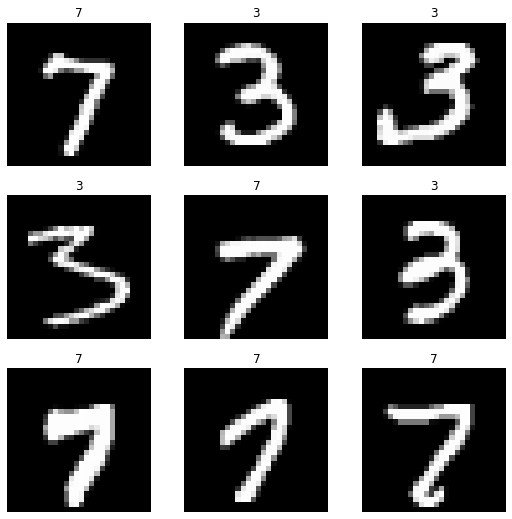

In [ ]:
dls.show_batch()

`(1)` cnn_learner를 이용하여 lrnr 오브젝트를 생성하라. 
- arch 는 resnet34 로 설정할 것 
- metrics 는 error_rate 로 설정할 것 

`(2)` fine_tune 을 이용하여 lrnr 오브젝트를 학습하라. 

`(3)` 아래를 이용하여 X,y를 만들어라. 

```python
X,y = dls.one_batch()
```

X,y의 shape을 조사하라. X에는 몇개의 이미지가 있는가? 이미지의 size는 얼마인가? 

`(4)` 아래의 코드를 이용하여 X의 두번째 이미지가 어떠한 숫자를 의미하는지 확인하라. (그림보고 3인지 7인지 확인하여 답을 쓸 것)
```python
show_image(X[0])
```

그리고 show_image가 정의된 파일의 경로를 확인하고 show_image가 python 내장함수 인지, torch에서 지원하는 함수인지 fastai에서 지원하는 함수인지 파악하라. 

`(5)` lrnr 오브젝트를 이용하여 AI가 X[0]을 어떤 값으로 판단하는지 확인하라. 올바르게 판단하였는가? 올바르게 판단했다면 몇 프로의 확신으로 판단하였는가?

## `2`. 추천시스템

아래를 이용하여 rcmd_anal.csv 를 다운로드 받고 dls오브젝트를 만들어라.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')

`(1)` 73번 유저가 먹은 아이템 및 평점을 출력하는 코드를 작성하라. 이를 기반으로 73번 유저가 어떠한 취향인지 파악하라. 

`(2)` dls와 lrnr 오브젝트를 생성하고 lrnr 오브젝트를 학습하라. 

`(3)` 아래와 같은 데이터 프레임을 생성하고 df_new 에 저장하라. 

In [ ]:
#hide
import IPython 
_html='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>user</th>\n      <th>item</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>73</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>73</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>73</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>73</td>\n      <td>4</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>73</td>\n      <td>5</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>73</td>\n      <td>6</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>73</td>\n      <td>7</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>73</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>73</td>\n      <td>9</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>73</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>73</td>\n      <td>11</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>73</td>\n      <td>12</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>73</td>\n      <td>13</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>73</td>\n      <td>14</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>73</td>\n      <td>15</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>73</td>\n      <td>16</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>73</td>\n      <td>17</td>\n    </tr>\n    <tr>\n      <th>17</th>\n      <td>73</td>\n      <td>18</td>\n    </tr>\n    <tr>\n      <th>18</th>\n      <td>73</td>\n      <td>19</td>\n    </tr>\n    <tr>\n      <th>19</th>\n      <td>73</td>\n      <td>20</td>\n    </tr>\n  </tbody>\n</table>'
IPython.display.HTML(_html)

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


`(4)` 아래의 코드를 이용하여 73번 유저의 취향을 파악하라. 73번 유저가 커피3, 커피5를 먹는다면 얼마정도의 평점을 줄 것이라 예측되는가? 

```Python
_dl = dls.test_dl(df_new)
lrnr.get_preds(dl=_dl)
```


## `3`. 시퀀스자료분석

아래를 이용하여 자료를 다운로드 받아라. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-19-human_numbers_100.csv')

`(1)` TextDataLoaders.from_df을 이용하여 dls오브젝트를 만들어라. 
- is_lm = True 로 설정할 것 
- seq_len = 5 로 설정할 것 

`(2)` lrnr 오브젝트를 만들어라. 
- arch = AWD_LSTM 이용 
- metrics = accuracy 이용 

`(3)` lrnr오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습하라. 

`(4)` 'one , two ,' 이후에 이어질 50개의 단어를 생성하라.

`(5)` 'twenty , twenty one , ' 이후에 이어질 50개의 단어를 생성하라. 

## `4`. 리눅스명령어

Collab 에서 (혹은 리눅스기반 서버에서) 아래의 명령어를 순서대로 실행해보라. 
```
!ls
!ls -a 
!ls .
!ls .. 
!ls sample
!mkdir asdf 
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
!cp 2022-09-08-rcmd_anal.csv ./asdf 
!ls ./asdf 
!rm 2022-09-08-rcmd_anal.csv 
!rm -rf asdf 
```

각 명령들이 무엇을 의미하는지 간단히 서술하라. 